In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def calculate_voltage_drop(time, current, R0, R1, R2, C1, C2):
    """
    Calculate the voltage drop across a 2RC equivalent circuit model given time vector and curent vector

    Parameters:
        time: array_like
            Time vector.
        current: array_like
            Current vector corresponding to the time vector.
        R0: float
            Resistance R0 in ohms.
        R1: float
            Resistance R1 in ohms.
        R2: float
            Resistance R2 in ohms.
        C1: float
            Capacitance C1 in farads.
        C2: float
            Capacitance C2 in farads.

    Returns:
        array_like
            Voltage drop array corresponding to the time vector.
    """
    dt = time[1] - time[0]  # time has uniform steps
    V = np.zeros_like(time)
    for i in range(1, len(time)):
        dV = (current[i] - (V[i - 1] - current[i] * R0) / R1 - V[i - 1] / R2) / C1 - V[i - 1] / (R2 * C2)
        V[i] = V[i - 1] + dV * dt
        
        if V[i] > 1e10 or V[i] < -1e10:
            #  Numerical overflow at time step i
            break
            
    return V

In [166]:
# Sample
total_points = np.int64(2811)
time = np.arange(0, total_points, 1.0)  # Time vector with step size of 1.0
current = np.zeros(total_points)  # Random current vector within the range -100 to 100
current[2:1501] = 33
R0 = 1.23e-5  # Ohms
R1 = 0.001125  # Ohms
R2 = 0.002928  # Ohms
C1 = 947.82  #  Farads
C2 = 204204 # Farads

voltage_drop = calculate_voltage_drop(time, current, R0, R1, R2, C1, C2)
print(f"No of values in Time {len(time)}")
print(f"No of values in Current {len(current)}")
print(f"Time (first 100 values) {time[:100]}")
print(f"Current (first 100 values) ==> {current[:100]}")

No of values in Time 2811
No of values in Current 2811
Time (first 100 values) [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
Current (first 100 values) ==> [ 0.  0. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.]


In [169]:
print(f"Time Vector (first 100 values) {time[:100]}")
print(f"Current (first 100 values) {current[:100]}")
print(f"Voltage Drop (first 100 values) {voltage_drop[:100]}")

Time Vector (first 100 values) [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
Current (first 100 values) [ 0.  0. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.]
Voltage Drop (first 100 values) [0.         0.         0.0351974  0.02464419 0.02780835 0.02685964
 0.02714409 0.02705881 0.0270

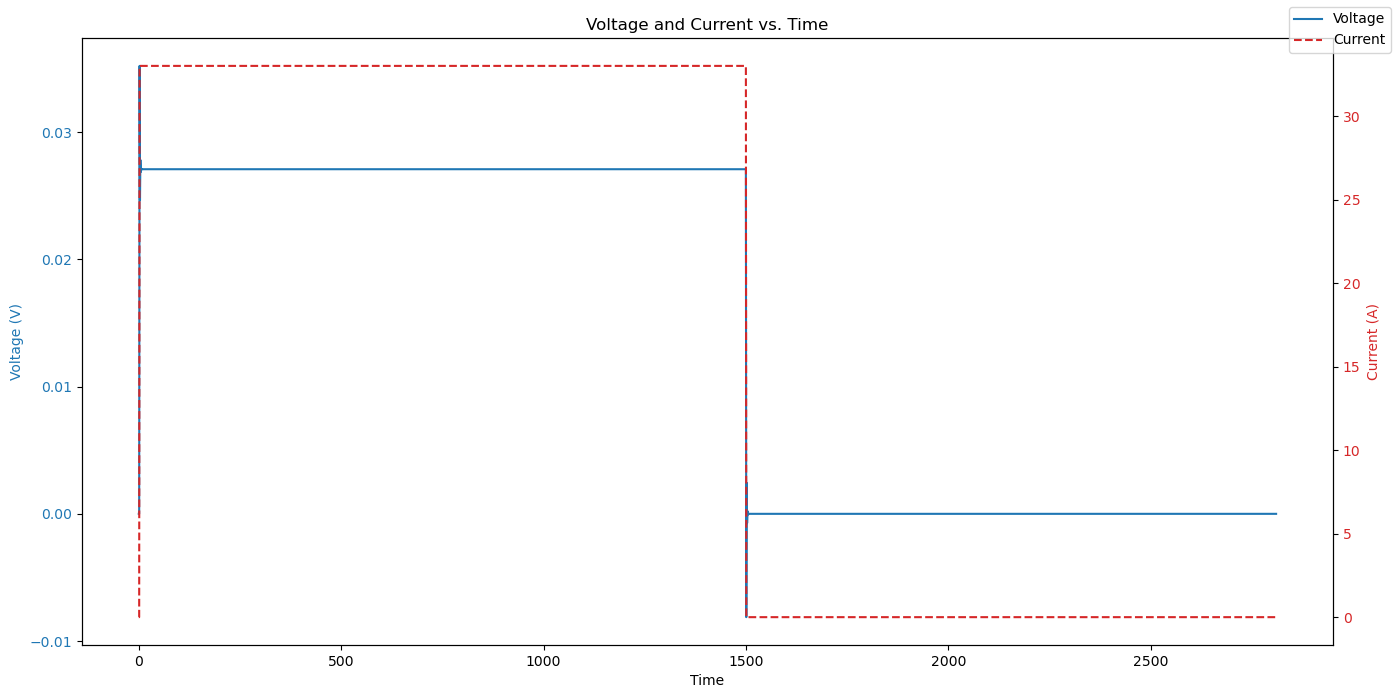

In [168]:
# Plot

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot voltage on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(time, voltage_drop, color=color, label='Voltage')
ax1.tick_params(axis='y', labelcolor=color)

# second y-axis for current
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Current (A)', color=color)
ax2.plot(time, current, color=color, linestyle='--', label='Current')
ax2.tick_params(axis='y', labelcolor=color)

# legend
fig.legend(loc='upper right')

# Display the plot
plt.title('Voltage and Current vs. Time')
fig.tight_layout()  
plt.show()